In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, f1_score

from tqdm import tqdm
from math import log10

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.metrics import top_k_accuracy_score
from sklearn.feature_selection import f_classif, f_regression

import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Get top 10 features for sat prediction 

In [2]:
runtimes = pd.read_excel('C:/Users/Jasmin/Documents/MSc-Thesis/Data/Runtime/Results-MIPVerify_SDPdMLPa.xlsx')
df = pd.read_csv('C:/Users/Jasmin/Documents/MSc-Thesis/Feature_Extraction/feature_data_rp/RP_data_07.csv')
df['INSTANCE_NAME'] = df['INSTANCE_NAME'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
lp_list = list(df['INSTANCE_NAME'])
runtimes = runtimes.loc[runtimes['SampleNumber'].isin(lp_list)]
df = df.rename(columns={"INSTANCE_NAME": "SampleNumber"})
## Join the two datasets by samplenumber/lp_file
df = pd.merge(df, runtimes, on="SampleNumber")
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
df = df.drop(cols_to_drop, axis=1)
df = df.T.drop_duplicates().T
df

,n_vars,n_constr,n_nzcnt,lp_avg,lp_l2_avg,lp_linf,num_i_variables,num_c_variables,ratio_i_variables,ratio_c_variables,...,SolveTime_default,SolveStatus_default,SolveTime_conf1,SolveStatus_conf1,SolveTime_conf2,SolveStatus_conf2,SolveTime_conf3,SolveStatus_conf3,SolveTime_best,Config_best
0,3005.0,4440.0,532558.0,0.110512,0.191534,0.49789,330.0,2675.0,0.109817,0.890183,...,104.393417,InfeasibleOrUnbounded,152.683291,InfeasibleOrUnbounded,44.068493,Infeasible,78.731996,Infeasible,44.068493,SolveTime_conf2
1,2971.0,4372.0,505477.0,0.134393,0.221089,0.49955,313.0,2658.0,0.105352,0.894648,...,9600.019248,UserLimit,9600.330209,UserLimit,9600.206703,UserLimit,9600.171495,UserLimit,9600.019248,TIMEOUT
2,2967.0,4364.0,502291.0,0.106764,0.190398,0.498555,311.0,2656.0,0.10482,0.89518,...,89.865928,InfeasibleOrUnbounded,779.582903,InfeasibleOrUnbounded,80.580781,Infeasible,215.399513,Infeasible,80.580781,SolveTime_conf2
3,3011.0,4452.0,537337.0,0.230292,0.322005,0.499855,333.0,2678.0,0.110594,0.889406,...,9600.048013,UserLimit,9600.379411,UserLimit,9600.130473,UserLimit,9600.117678,UserLimit,9600.048013,TIMEOUT
4,2897.0,4224.0,446536.0,0.13335,0.217471,0.498412,276.0,2621.0,0.095271,0.904729,...,22.112561,InfeasibleOrUnbounded,378.362607,InfeasibleOrUnbounded,78.919991,Infeasible,18.838446,Infeasible,18.838446,SolveTime_conf3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2943.0,4316.0,483175.0,0.125741,0.204121,0.499159,299.0,2644.0,0.101597,0.898403,...,136.404467,InfeasibleOrUnbounded,169.627541,InfeasibleOrUnbounded,179.118139,Infeasible,200.96392,Infeasible,136.404467,SolveTime_default
9996,2843.0,4116.0,403525.0,0.129329,0.21971,0.499019,249.0,2594.0,0.087583,0.912416,...,12.67472,InfeasibleOrUnbounded,18608.097787,UserLimit,25.863838,Infeasible,172.11687,Infeasible,12.67472,SolveTime_default
9997,2947.0,4324.0,486361.0,0.161295,0.257694,0.499142,301.0,2646.0,0.102138,0.897862,...,18.37995,InfeasibleOrUnbounded,110.131027,InfeasibleOrUnbounded,50.209194,Infeasible,110.876559,Infeasible,18.37995,SolveTime_default
9998,2933.0,4296.0,475210.0,0.125582,0.210217,0.49904,294.0,2639.0,0.100239,0.899761,...,75.684641,InfeasibleOrUnbounded,105.670172,InfeasibleOrUnbounded,106.346014,Infeasible,102.81169,Infeasible,75.684641,SolveTime_default


InfeasibleOrUnbounded    3252
UserLimit                1329
Optimal                   419
Name: SolveStatus_default, dtype: int64
InfeasibleOrUnbounded    3253
UserLimit                1329
Optimal                   418
Name: SolveStatus_default, dtype: int64
training accuracy: 1.0
test accuracy: 0.7308
[[3085  168    0]
 [ 827  490   12]
 [ 214  125   79]]


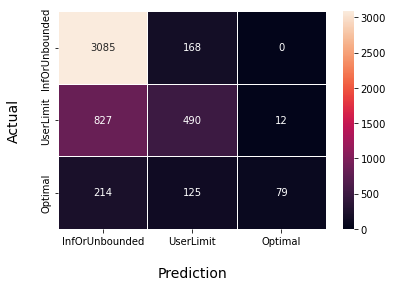

,lp_l2_avg,lp_avg,vcg_var_weight1_avg,rhs_c_0_avg,cplex_prob_time,vcg_var_weight1_varcoef,rhs_c_0_varcoef,rhs_c_1_varcoef,rhs_c_1_avg,vcg_var_weight2_avg
0,0.039216,0.033592,0.029612,0.029482,0.027556,0.027551,0.026872,0.026824,0.026682,0.024932


In [3]:
#### SOLVER STATUS DEFAULT
X = df.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best'], axis = 1)
y = df['SolveStatus_default']
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .5, random_state = 42, stratify=y)
print(training_labels.value_counts())
print(testing_labels.value_counts())

clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
#print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds))


c_array = confusion_matrix(testing_labels, preds, labels=['InfeasibleOrUnbounded', 'UserLimit', 'Optimal'])
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Classification of Config default solver status using SCIP feature extractor")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['InfOrUnbounded', 'UserLimit', 'Optimal'])
ax.yaxis.set_ticklabels(['InfOrUnbounded', 'UserLimit', 'Optimal'])
plt.show()

pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False).head(10).T

InfeasibleOrUnbounded    6505
Optimal                   837
Name: SolveStatus_default, dtype: int64
InfeasibleOrUnbounded    3252
Optimal                   419
Name: SolveStatus_default, dtype: int64
InfeasibleOrUnbounded    3253
Optimal                   418
Name: SolveStatus_default, dtype: int64
training accuracy: 1.0
test accuracy: 0.9147371288477254
f1 score: 0.4575389948006932
[[3226   27]
 [ 286  132]]


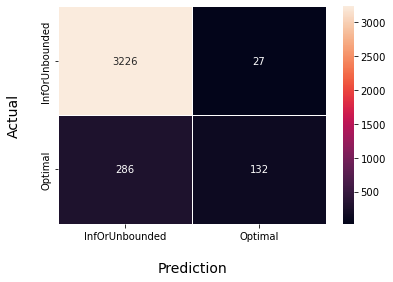

,mipgap,lp_l2_avg,cplex_prob_time,lp_avg,rhs_c_0_varcoef,vcg_var_weight1_varcoef,vcg_var_weight1_avg,rhs_c_0_avg,vcg_constr_weight0_avg,vcg_var_weight0_avg
0,0.081911,0.060229,0.042993,0.041274,0.038132,0.025325,0.023369,0.022949,0.021408,0.021397


In [4]:
## Without UserLimit
#### SOLVER STATUS DEFAULT
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, f1_score


df_no_ul = df[df.SolveStatus_default != 'UserLimit']
#print(len(df_no_ul.SolveStatus_default))
print(df_no_ul['SolveStatus_default'].value_counts())


X = df_no_ul.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best'], axis = 1)
y = df_no_ul['SolveStatus_default']
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .5, random_state = 42, stratify=y)
print(training_labels.value_counts())
print(testing_labels.value_counts())

clf=RandomForestClassifier()
clf.fit(training, training_labels)
preds = clf.predict(testing)

print("training accuracy:", clf.score(training, training_labels))
print("test accuracy:", clf.score(testing, testing_labels))
print("f1 score:", f1_score(y_true=testing_labels, y_pred=preds, pos_label='Optimal'))


c_array = confusion_matrix(testing_labels, preds, labels=['InfeasibleOrUnbounded', 'Optimal'])
print(c_array)


ax = plt.axes()
ax = sns.heatmap(c_array, linewidth=0.5, annot=True, fmt='d')
#ax.set_title("Binary Classification of Config default solver status using SCIP feature extractor")
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.set_xlabel("Prediction", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['InfOrUnbounded', 'Optimal'])
ax.yaxis.set_ticklabels(['InfOrUnbounded', 'Optimal'])
plt.show()

pd.DataFrame(clf.feature_importances_, index=training.columns).sort_values(by=0, ascending=False).head(10).T

## Principle Component analysis

In [5]:
X = df.drop(['SolveTime_default','SampleNumber', 'SolveStatus_default', 'SolveTime_conf1', 'SolveStatus_conf1','SolveTime_conf2', 'SolveStatus_conf2', 'SolveTime_conf3', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best'], axis = 1)
y =  df['SolveStatus_default']

x_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pcs = pca.fit_transform(x_scaled)


pcaDF = pd.DataFrame(data = pcs, columns = ['principal component 1', 'principal component 2'])
print(pcaDF)

print(pca.components_)

# ratio of the total variance each principal component captures.
print(sum(pca.explained_variance_ratio_))

dfpca = pd.concat([pcaDF, y], axis = 1)
dfpca

      principal component 1  principal component 2
0                  5.805914               2.010105
1                  1.647335               0.936861
2                  1.037994              -4.662644
3                  7.512266               0.505470
4                 -8.226842              -1.839790
...                     ...                    ...
9995              -2.451278               6.016322
9996             -16.988418               1.086687
9997              -2.049178              -2.188384
9998              -3.838410              -1.382115
9999              -2.369766               4.704767

[10000 rows x 2 columns]
[[ 1.46403312e-01  1.46403312e-01  1.46403312e-01 -2.36667390e-03
  -5.69521632e-03  8.11733698e-04  1.46403312e-01  1.46403312e-01
   1.46440881e-01 -1.46440880e-01 -1.16310231e-02  7.51073412e-02
  -1.01173428e-01  9.23537266e-02  1.81953392e-02  1.96872559e-03
   1.46433985e-01 -1.46023733e-01  8.67130459e-03  2.09444984e-02
  -3.99023506e-02  4.34129166e-0

,principal component 1,principal component 2,SolveStatus_default
0,5.805914,2.010105,InfeasibleOrUnbounded
1,1.647335,0.936861,UserLimit
2,1.037994,-4.662644,InfeasibleOrUnbounded
3,7.512266,0.505470,UserLimit
4,-8.226842,-1.839790,InfeasibleOrUnbounded
...,...,...,...
9995,-2.451278,6.016322,InfeasibleOrUnbounded
9996,-16.988418,1.086687,InfeasibleOrUnbounded
9997,-2.049178,-2.188384,InfeasibleOrUnbounded
9998,-3.838410,-1.382115,InfeasibleOrUnbounded


In [6]:
modified_dfpca = dfpca.drop(dfpca[dfpca['principal component 2'] > 150].index)

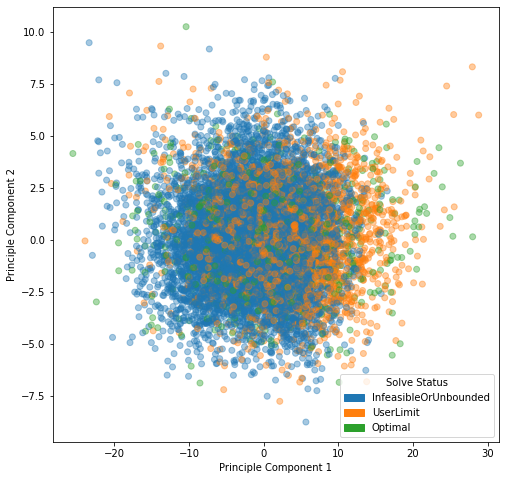

In [7]:
import matplotlib.patches

#####################
#fig = plt.figure(figsize = (8,8))
#ax = fig.add_subplot(1,1,1) 

fig = plt.figure(figsize = (8,8))
levels, categories = pd.factorize(modified_dfpca['SolveStatus_default'])
colors = [plt.cm.tab10(i) for i in levels] # using the "tab10" colormap
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]


plt.scatter(modified_dfpca['principal component 1'], 
           modified_dfpca['principal component 2'],c=colors, alpha=0.4)
plt.gca().set(xlabel='Principle Component 1', ylabel='Principle Component 2')
plt.legend(handles=handles, title='Solve Status')

In [8]:
X = df.drop(['SolveTime_default','SampleNumber', 'SolveStatus_default', 'SolveTime_conf1', 'SolveStatus_conf1','SolveTime_conf2', 'SolveStatus_conf2', 'SolveTime_conf3', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best'], axis = 1)
y = df['SolveStatus_default']
x_scaled = StandardScaler().fit_transform(X)

EVR = []
nlist = []
for n in range(40):
    pca = PCA(n_components=n)
    pca.fit_transform(x_scaled)
    # ratio of the total variance each principal component captures.
    print(sum(pca.explained_variance_ratio_))
    EVR.append(sum(pca.explained_variance_ratio_))
    nlist.append(n)

0
0.5738184542407843
0.6476686215026138
0.6954016194634894
0.7269493420733045
0.7567385687726469
0.7840649767286468
0.8068622210330377
0.8225083673370036
0.8373398651439147
0.8513322251687133
0.863983366141317
0.8765855903132952
0.8889379713785496
0.9012148355495488
0.9132526692425441
0.9249237387041808
0.9361389679445031
0.9465712501659952
0.9552824047572042
0.9635134935423824
0.9706350578744813
0.976992563782642
0.9825824627815046
0.9868114349920176
0.9902382657598406
0.9927341045151766
0.9949653902234198
0.9963222964736942
0.9975772072271057
0.9982930491456735
0.9989457244094302
0.9993686908352319
0.9996522934700651
0.9998690799832644
0.9999165646077934
0.9999590075837372
0.9999833605162116
0.9999902189329183
0.9999945117854312


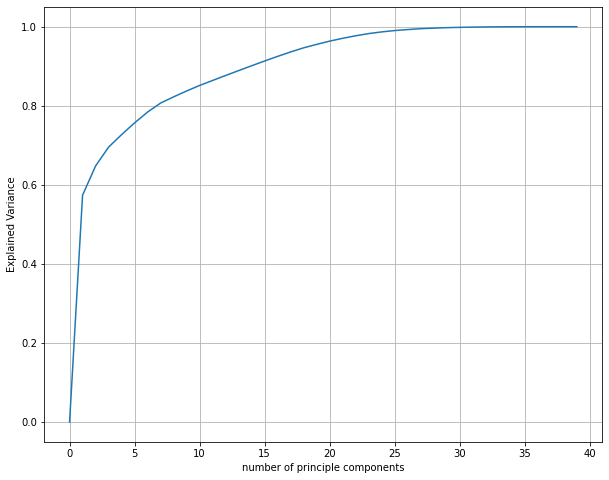

In [11]:
plt.figure(figsize=(10,8))
plt.plot(nlist, EVR)
plt.xticks(np.arange(0, 41, step=5))
plt.xlabel('number of principle components')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()

InfeasibleOrUnbounded    6505
Optimal                   837
Name: SolveStatus_default, dtype: int64
      principal component 1  principal component 2
0                  7.429458               2.239102
1                  2.401480              -4.583855
2                 -7.491195              -1.851447
3                 -5.222354              -0.458415
4                 -5.799478               0.935803
...                     ...                    ...
7337              -1.388232               6.201567
7338             -16.660403               1.044645
7339              -0.842637              -2.164191
7340              -2.756955              -1.311978
7341              -1.301480               4.759092

[7342 rows x 2 columns]
[[ 1.47342028e-01  1.47342028e-01  1.47342028e-01 -5.79938970e-03
  -8.45062804e-03 -8.49451872e-04  1.47342028e-01  1.47342028e-01
   1.47385226e-01 -1.47385224e-01 -2.01375995e-02  7.69799038e-02
  -9.71999700e-02  8.75372953e-02 -2.86929739e-04  2.47823497e-03

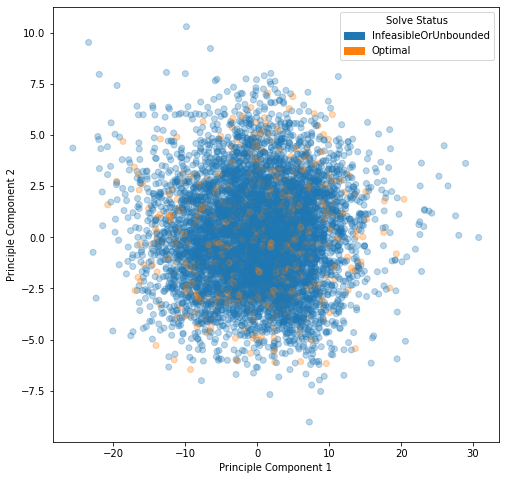

In [14]:
# Remove timeouts
df_no_ul = df[df.SolveStatus_default != 'UserLimit']
#print(len(df_no_ul.SolveStatus_default))
print(df_no_ul['SolveStatus_default'].value_counts())


X = df_no_ul.drop(['SampleNumber', 'SolveTime_conf1', 'SolveTime_conf2', 'SolveTime_conf3', 'SolveTime_default', 'SolveStatus_default', 'SolveStatus_conf1', 'SolveStatus_conf2', 'SolveStatus_conf3', 'SolveTime_best', 'Config_best'], axis = 1)
y = df_no_ul['SolveStatus_default']

x_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pcs = pca.fit_transform(x_scaled)


pcaDF = pd.DataFrame(data = pcs, columns = ['principal component 1', 'principal component 2'])
print(pcaDF)

print(pca.components_)

# ratio of the total variance each principal component captures.
print(sum(pca.explained_variance_ratio_))

dfpca = pd.concat([pcaDF, y], axis = 1)
dfpca


modified_dfpca = dfpca.drop(dfpca[dfpca['principal component 2'] > 150].index)


fig = plt.figure(figsize = (8,8))
levels, categories = pd.factorize(modified_dfpca['SolveStatus_default'])
colors = [plt.cm.tab10(i) for i in levels] # using the "tab10" colormap
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]


plt.scatter(modified_dfpca['principal component 1'], 
           modified_dfpca['principal component 2'],c=colors, alpha=0.3)
plt.gca().set(xlabel='Principle Component 1', ylabel='Principle Component 2')
plt.legend(handles=handles, title='Solve Status')

